In [1]:
import torch

In [2]:
import os
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms


In [3]:
class PatternDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.data = []
        self.image_extensions = {'.png', '.jpg', '.jpeg'}
        
        # Keep track of processed directories to avoid duplicates
        processed_dirs = set()
        
        for root, _, files in os.walk(root_dir):
            # Get image files in current directory
            image_files = [
                os.path.join(root, f) for f in files
                if os.path.splitext(f.lower())[1] in self.image_extensions
            ]
            
            if image_files:
                # Get full hierarchy information
                rel_path = os.path.relpath(root, root_dir)
                path_components = rel_path.split(os.sep)
                
                # Create structured metadata
                pattern_info = {
                    'root_category': path_components[0] if len(path_components) > 0 else '',
                    'main_category': path_components[1] if len(path_components) > 1 else '',
                    'sub_category': path_components[2] if len(path_components) > 2 else '',
                    'pattern_id': path_components[-1],
                    'full_path': root,
                    'images': sorted(image_files)  # Sort to ensure consistent ordering
                }
                
                # Only add if this directory hasn't been processed
                if root not in processed_dirs:
                    self.data.append(pattern_info)
                    processed_dirs.add(root)
        
        # Sort data for consistent ordering
        # self.data.sort(key=lambda x: x['full_path'])
        
        # Print dataset statistics
        self._print_statistics()

    def _print_statistics(self):
        """Print dataset statistics for verification"""
        print(f"\nDataset Statistics:")
        print(f"Total pattern groups: {len(self.data)}")
        
        # Count by root category
        root_cats = {}
        for item in self.data:
            root_cat = item['root_category']
            if root_cat not in root_cats:
                root_cats[root_cat] = {'patterns': 0, 'images': 0}
            root_cats[root_cat]['patterns'] += 1
            root_cats[root_cat]['images'] += len(item['images'])
        
        print("\nBreakdown by root category:")
        for cat, stats in root_cats.items():
            print(f"{cat}:")
            print(f"  Patterns: {stats['patterns']}")
            print(f"  Images: {stats['images']}")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        """
        Returns:
            dict: Contains pattern information and images
        """
        pattern_info = self.data[idx]
        
        # Load and transform images
        images = []
        for img_path in pattern_info['images']:
            try:
                img = Image.open(img_path).convert("RGB")
                if self.transform:
                    img = self.transform(img)
                images.append(img)
            except Exception as e:
                print(f"Error loading image {img_path}: {str(e)}")
                continue
        
        return {
            'pattern_id': pattern_info['pattern_id'],
            'root_category': pattern_info['root_category'],
            'main_category': pattern_info['main_category'],
            'sub_category': pattern_info['sub_category'],
            'images': images,
            'paths': pattern_info['images']
        }
    
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),  
    # transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Instantiate the dataset
root_dir = "machine-learning-set/"
dataset = PatternDataset(root_dir=root_dir, transform=transform)


Dataset Statistics:
Total pattern groups: 6940

Breakdown by root category:
FHD 1163:
  Patterns: 1164
  Images: 5809
GMIC PROD 477:
  Patterns: 477
  Images: 2385
900x1200 4954:
  Patterns: 5299
  Images: 26492


In [4]:
for i in range(5500,5505):
    sample = dataset[i]
    print(f"\nPattern {sample['pattern_id']}:")
    print(f"Category: {sample['root_category']}/{sample['main_category']}")
    print(f"Images: {len(sample['images'])}")
    print(f"Paths: {[os.path.basename(p) for p in sample['paths']]}")


Pattern 52600:
Category: 900x1200 4954/JT3 708
Images: 5
Paths: ['0.png', '1.png', '2.png', '3.png', '4.png']

Pattern 47129:
Category: 900x1200 4954/JT3 708
Images: 5
Paths: ['0.png', '1.png', '2.png', '3.png', '4.png']

Pattern 39508:
Category: 900x1200 4954/JT3 708
Images: 5
Paths: ['0.png', '1.png', '2.png', '3.png', '4.png']

Pattern 95952:
Category: 900x1200 4954/JT3 708
Images: 5
Paths: ['0.png', '1.png', '2.png', '3.png', '4.png']

Pattern 14634:
Category: 900x1200 4954/JT3 708
Images: 5
Paths: ['0.png', '1.png', '2.png', '3.png', '4.png']


In [5]:
sample['pattern_id']

'14634'

In [7]:
tensor_image = sample['images'][1]
print(f"Tensor shape: {tensor_image.shape}")

tensor_image

Tensor shape: torch.Size([3, 512, 512])


tensor([[[0.2000, 0.2000, 0.1882,  ..., 0.2235, 0.1843, 0.2000],
         [0.2000, 0.2000, 0.1882,  ..., 0.2235, 0.1843, 0.2000],
         [0.2000, 0.2000, 0.1882,  ..., 0.1725, 0.1843, 0.2000],
         ...,
         [0.2000, 0.2000, 0.2000,  ..., 0.1882, 0.2000, 0.2000],
         [0.2000, 0.2000, 0.1882,  ..., 0.1725, 0.1843, 0.2000],
         [0.2000, 0.2000, 0.1882,  ..., 0.2235, 0.1843, 0.2000]],

        [[0.1882, 0.1882, 0.1882,  ..., 0.1843, 0.1843, 0.1882],
         [0.1882, 0.1882, 0.1882,  ..., 0.1843, 0.1843, 0.1882],
         [0.1882, 0.1882, 0.1882,  ..., 0.1843, 0.1843, 0.1882],
         ...,
         [0.1882, 0.1882, 0.1882,  ..., 0.1882, 0.1882, 0.1882],
         [0.1882, 0.1882, 0.1882,  ..., 0.1843, 0.1843, 0.1882],
         [0.1882, 0.1882, 0.1882,  ..., 0.1843, 0.1843, 0.1882]],

        [[0.1922, 0.1922, 0.1922,  ..., 0.1961, 0.1961, 0.1922],
         [0.1922, 0.1922, 0.1922,  ..., 0.1961, 0.1961, 0.1922],
         [0.1922, 0.1922, 0.1922,  ..., 0.1961, 0.1961, 0.

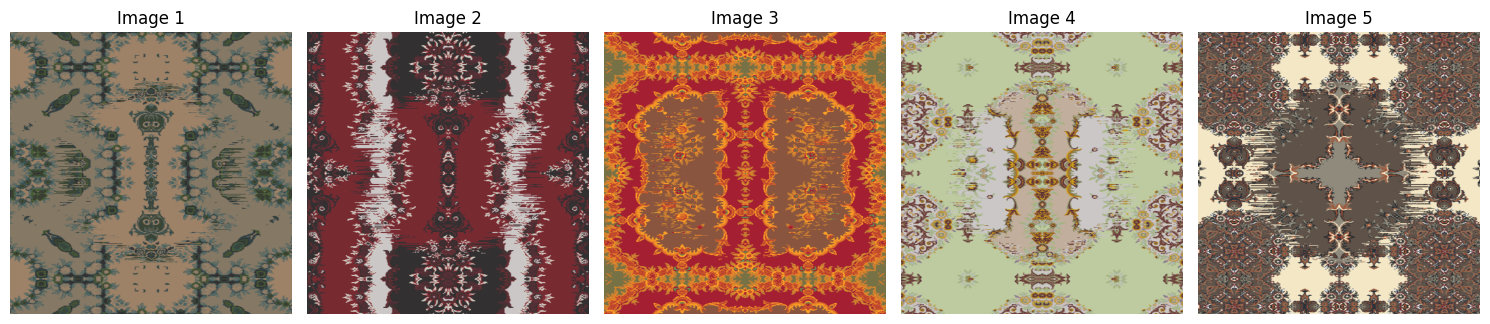

In [8]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torchvision.transforms.functional import to_pil_image


# Visualize the first design's variations
# design_id, images = dataset[9]

# Plot the images
# grid = make_grid(images, nrow=len(tensor_image), normalize=True, value_range=(0, 1))
# plt.figure(figsize=(15, 5))
# plt.imshow(grid.permute(1, 2, 0))
# plt.title(f"Variations of Design ID: {design_id}")
# plt.axis("off")
# plt.show()

plt.figure(figsize=(15, 5))  # Adjust the figure size to fit all images

# Iterate through each image and plot it
for idx, tensor_image in enumerate(sample['images']):
    plt.subplot(1, len(sample['images']), idx + 1)  # Create a subplot for each image
    image = to_pil_image(sample['images'][idx])  # Convert tensor to PIL image (ulto para le parse garni C, H, W )
    plt.imshow(image)
    plt.axis("off")  # Hide axis for cleaner display
    plt.title(f"Image {idx + 1}")  # Optional: Add a title for each image

plt.tight_layout()
plt.show()


In [3]:
len(dataset)

6940

In [9]:
def custom_collate(batch):
    pattern_ids = [item["pattern_id"] for item in batch]
    root = [item["root_category"] for item in batch]
    images = [torch.stack(item["images"]) for item in batch]  # Stack images for each pattern

    return {
        "pattern_id": pattern_ids,
        "root_category":root,
        "images": images  # Now a list of 4 tensors, each with shape (5, C, H, W)
    }
    

In [11]:
from torch.utils.data import DataLoader
data_loader = DataLoader(
    dataset=dataset,
    batch_size=4,  # Number of patterns per batch
    shuffle=True,  # Shuffle patterns for randomness
    collate_fn=custom_collate,
    num_workers=4  # Use multiple threads for data loading
)

# Iterate through the DataLoader
for batch in data_loader:
    print("Batch:")
    print(f"  Pattern IDs: {batch['pattern_id']}")
    print(f"  Root Categories: {batch['root_category']}")
    # print(f" Main categories:{batch['main_category']}")
    print(f"  Number of Images per Pattern: {[len(imgs) for imgs in batch['images']]}")
    break

Batch:
  Pattern IDs: ['12343', '36620', '88654', '37682']
  Root Categories: ['900x1200 4954', '900x1200 4954', '900x1200 4954', '900x1200 4954']
  Number of Images per Pattern: [5, 5, 5, 5]


In [12]:
# Print general structure
print(f"Type of batch['images']: {type(batch['images'])}")  # Should be list
print(f"Length of batch['images']: {len(batch['images'])}")  # Should be batch_size (4)

# Inspect the first tensor in the list
first_tensor = batch['images'][0]
print(f"Type of first element: {type(first_tensor)}")  # Should be a tensor
print(f"Shape of first element: {first_tensor.shape}")  # Should be (5, C, H, W) if 5 images per pattern

# Verify that all tensors in the list have the same structure
for i, img_tensor in enumerate(batch["images"]):
    print(f"Pattern {i}: Shape = {img_tensor.shape}")

Type of batch['images']: <class 'list'>
Length of batch['images']: 4
Type of first element: <class 'torch.Tensor'>
Shape of first element: torch.Size([5, 3, 512, 512])
Pattern 0: Shape = torch.Size([5, 3, 512, 512])
Pattern 1: Shape = torch.Size([5, 3, 512, 512])
Pattern 2: Shape = torch.Size([5, 3, 512, 512])
Pattern 3: Shape = torch.Size([5, 3, 512, 512])


In [87]:
'''
kura bigrida kheri ko expectation
'''

# print(batch["images"][0].shape)  # (4, 3, 512, 512) → First image across all 4 patterns
# print(batch["images"][1].shape)  # (4, 3, 512, 512) → Second image across all 4 patterns

# # Inspect a specific image
# print(batch["images"][0][0].shape)  # (3, 512, 512) → First image of first pattern
# print(batch["images"][0][1].shape)  # (3, 512, 512) → First image of second pattern

torch.Size([4, 3, 512, 512])
torch.Size([4, 3, 512, 512])
torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


In [54]:
batch

{'pattern_id': ['61697', '60868', '41522', '43197'],
 'root_category': ['900x1200 4954',
  'GMIC PROD 477',
  '900x1200 4954',
  'FHD 1163'],
 'main_category': ['JT2 1073', 'Floral 20', 'JT 1 1562', 'Mirror Ashm 640'],
 'sub_category': ['Cha -M1 100', '60868', 'Sets of 5-01 244', '43197'],
 'images': [tensor([[[[0.9059, 0.9059, 0.9059,  ..., 0.6235, 0.9059, 0.9059],
            [0.9059, 0.9059, 0.6235,  ..., 0.1569, 0.4392, 0.9059],
            [0.9059, 0.4392, 0.1569,  ..., 0.1569, 0.4392, 0.9059],
            ...,
            [0.9059, 0.4392, 0.1569,  ..., 0.1569, 0.1569, 0.1569],
            [0.9059, 0.9059, 0.6235,  ..., 0.1569, 0.4392, 0.9059],
            [0.9059, 0.9059, 0.6235,  ..., 0.6235, 0.9059, 0.9059]],
  
           [[0.8353, 0.8353, 0.8353,  ..., 0.6471, 0.8353, 0.8353],
            [0.8353, 0.8353, 0.6471,  ..., 0.3373, 0.5255, 0.8353],
            [0.8353, 0.5255, 0.3373,  ..., 0.3373, 0.5255, 0.8353],
            ...,
            [0.8353, 0.5255, 0.3373,  ..., 0.3373

In [55]:
batch['images'][0]

tensor([[[[0.9059, 0.9059, 0.9059,  ..., 0.6235, 0.9059, 0.9059],
          [0.9059, 0.9059, 0.6235,  ..., 0.1569, 0.4392, 0.9059],
          [0.9059, 0.4392, 0.1569,  ..., 0.1569, 0.4392, 0.9059],
          ...,
          [0.9059, 0.4392, 0.1569,  ..., 0.1569, 0.1569, 0.1569],
          [0.9059, 0.9059, 0.6235,  ..., 0.1569, 0.4392, 0.9059],
          [0.9059, 0.9059, 0.6235,  ..., 0.6235, 0.9059, 0.9059]],

         [[0.8353, 0.8353, 0.8353,  ..., 0.6471, 0.8353, 0.8353],
          [0.8353, 0.8353, 0.6471,  ..., 0.3373, 0.5255, 0.8353],
          [0.8353, 0.5255, 0.3373,  ..., 0.3373, 0.5255, 0.8353],
          ...,
          [0.8353, 0.5255, 0.3373,  ..., 0.3373, 0.3373, 0.3373],
          [0.8353, 0.8353, 0.6471,  ..., 0.3373, 0.5255, 0.8353],
          [0.8353, 0.8353, 0.6471,  ..., 0.6471, 0.8353, 0.8353]],

         [[0.7490, 0.7490, 0.7490,  ..., 0.6078, 0.7490, 0.7490],
          [0.7490, 0.7490, 0.6078,  ..., 0.3686, 0.5098, 0.7490],
          [0.7490, 0.5098, 0.3686,  ..., 0

In [77]:
print(type(batch['images']), type(batch['images'][0]))

<class 'list'> <class 'torch.Tensor'>


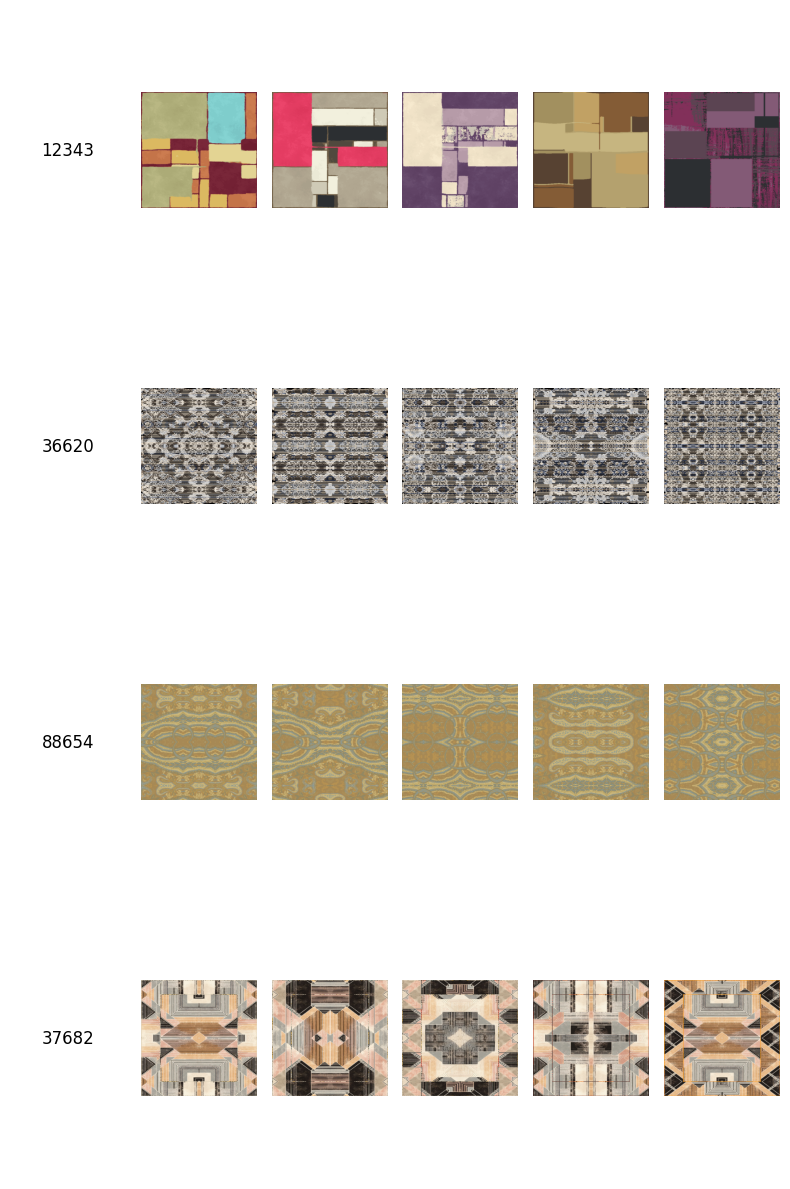

In [13]:
def visualize_batch(batch):
    pattern_ids = batch["pattern_id"]  # Pattern labels
    images_list = batch["images"]  # List of tensors (each containing multiple images)

    batch_size = len(images_list)  # Number of patterns
    num_columns = 6  # First column for pattern ID, next 5 for images

    fig, axes = plt.subplots(batch_size, num_columns, figsize=(batch_size * 2, num_columns * 2))

    for row in range(batch_size):
        # First column: Pattern ID
        axes[row, 0].text(0.5, 0.5, pattern_ids[row], fontsize=12, ha='center', va='center')
        axes[row, 0].set_xticks([])  # Remove ticks
        axes[row, 0].set_yticks([])
        axes[row, 0].spines['top'].set_visible(False)
        axes[row, 0].spines['right'].set_visible(False)
        axes[row, 0].spines['left'].set_visible(False)
        axes[row, 0].spines['bottom'].set_visible(False)

        # Plot images in remaining columns
        num_images = images_list[row].shape[0]  # Number of images for this pattern
        for col in range(1, num_columns):  # Columns 1 to 5 for images
            ax = axes[row, col]
            if col - 1 < num_images:  # Check if image exists
                img = images_list[row][col - 1]  # Extract image tensor (C, H, W)
                img = img.permute(1, 2, 0).numpy()  # Convert (C, H, W) → (H, W, C)
                ax.imshow(img)
            ax.axis("off")  # Hide axes

    plt.tight_layout()
    plt.show()

# Example usage
visualize_batch(batch)

In [64]:
max_images_per_pattern

4

In [59]:
import numpy as np

Total number of images: 5809


Inspecting directory: machine-learning-set
Inspecting directory: machine-learning-set/FHD 1163
Inspecting directory: machine-learning-set/FHD 1163/02 CT Concepts
Inspecting directory: machine-learning-set/FHD 1163/02 CT Concepts/Circles
Numeric directory found: machine-learning-set/FHD 1163/02 CT Concepts/Circles/71817
Numeric directory found: machine-learning-set/FHD 1163/02 CT Concepts/Circles/35004
Inspecting directory: machine-learning-set/FHD 1163/02 CT Concepts/Circles/71817
Inspecting directory: machine-learning-set/FHD 1163/02 CT Concepts/Circles/35004
Inspecting directory: machine-learning-set/FHD 1163/02 CT Concepts/CT regular e
Numeric directory found: machine-learning-set/FHD 1163/02 CT Concepts/CT regular e/32183
Inspecting directory: machine-learning-set/FHD 1163/02 CT Concepts/CT regular e/32183
Inspecting directory: machine-learning-set/FHD 1163/02 CT Concepts/Animal
Numeric directory found: machine-learning-set/FHD 1163/02 CT Concepts/Animal/17062
Numeric directory fou

In [9]:
l = os.walk(root_dir)

In [10]:
l

<generator object walk at 0x7f2ddb95e710>

In [23]:
next(iter(l))

('machine-learning-set/FHD 1163/02 CT Concepts/CT Geometric',
 ['51518', '21204', '46809', '79917', '25631', '34742'],
 [])

In [25]:
for dirpath, dirnames, filenames in os.walk("root"):
    print(f"Directory: {dirpath}")
    for dirname in dirnames:  # Loop through subdirectories
        print(f"  Subdirectory: {dirname}")
    for filename in filenames:  # Loop through files
        print(f"  File: {filename}")

Directory: root
  Subdirectory: subdir1
  Subdirectory: subdir2
  File: file1.txt
Directory: root/subdir1
  File: file3.txt
  File: file2.txt
Directory: root/subdir2
  Subdirectory: subsubdir3
  File: file4.txt
Directory: root/subdir2/subsubdir3
  File: file5.txt
